In [2]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

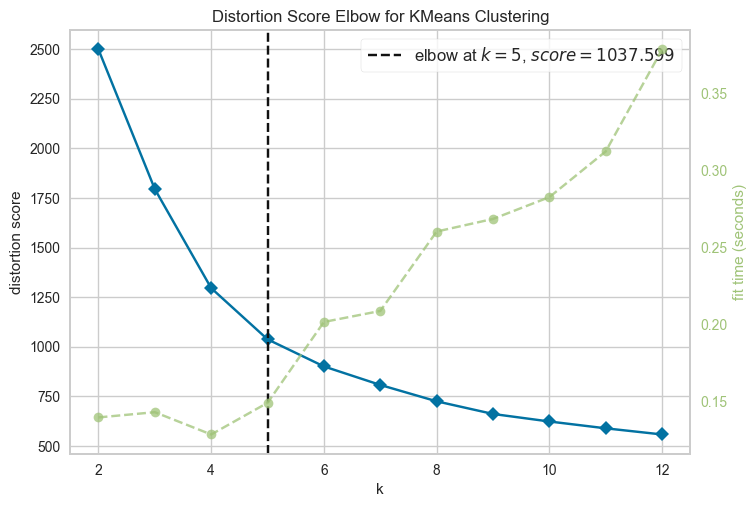

In [4]:
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]
model = KElbowVisualizer(KMeans(random_state = 20222023), k=12)
model.fit(df)
model.poof(outpath="肘部法则.pdf")

C:\Users\86137\AppData\Local\Temp\ipykernel_27356\1980072271.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)


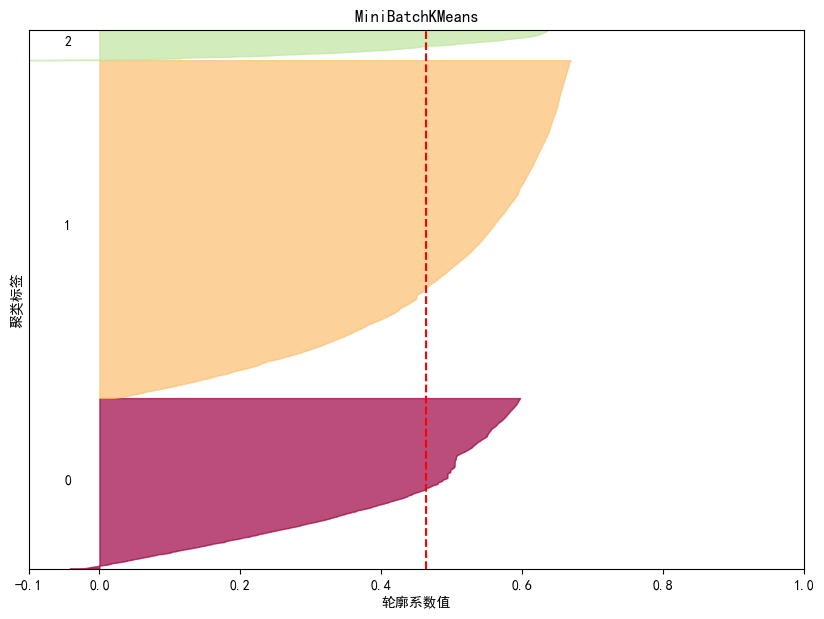

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus='False')
# 读取数据
data = pd.read_csv('day01标准归一.csv')

n_clusters=

# 提取特征列
X = data[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]

df=pd.read_csv('day01_MiniBatchKMeans.csv')
labels=df['cluster_label']
# 计算轮廓系数
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# 创建子图
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)

# 调整子图布局
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# 计算每个样本的轮廓范围
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # 添加轮廓标签
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # 更新下一个轮廓的起始位置
    y_lower = y_upper + 10

# 添加轴标签和标题
ax1.set_xlabel("轮廓系数值")
ax1.set_ylabel("聚类标签")
ax1.set_title("MiniBatchKMeans")
# 绘制平均轮廓系数竖线
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# 标记轴的范围
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 显示图形
plt.savefig('轮廓系数图MiniBatchKMeans.pdf')